<a href="https://colab.research.google.com/github/zh739/NYU_Integrated_Marketing/blob/main/Starbucks_Customer_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

In [10]:
pip install pingouin

     |████████████████████████████████| 225kB 11.6MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=5f0971dc81b2d245cfe5afc96f8901b66f27f6f3fdf8504779a3d88f924cad23
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=d0293fd292f5f4d8aac5d481bc7639e6d8f346a26a7aaf32a597e7f8b4e4bc39
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=74d02a412df40234e44992d0eb3837592a2d90741d8996bbfe51ce8a23e2b4d6
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [11]:
from google.colab import files
uploaded = files.upload()

Saving Starbucks satisfactory survey encode cleaned.csv to Starbucks satisfactory survey encode cleaned (1).csv


In [12]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Starbucks satisfactory survey encode cleaned.csv']))

In [13]:
df = pd.read_csv('Starbucks satisfactory survey encode cleaned.csv')
df=df.dropna()
df.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,itempurchaseCold,itemPurchasePastries,itemPurchaseJuices,itemPurchaseSandwiches,itemPurchaseOthers,spendPurchase,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,1,1,1,1,1,1,1,4,3,5,5,4,4,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,1,1,1,1,1,1,1,4,3,4,4,4,5,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,1,1,1,1,1,1,1,4,3,4,4,4,4,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,1,1,1,1,1,1,1,2,1,4,3,3,3,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,1,1,1,1,1,1,2,3,3,4,2,2,3,3,1,1,1,1,1,1,1,1,0


Gender:0 - Male, 1 - Female
Age:0 Below 20, 1 From 20 to 29, 2 From 30 to 39, 3 40 and above
Status: 0 Student, 1 Self-Employed, 2 Employed, 3 Housewife
Income: 0 Less than RM25,000; 1 RM25,000 – RM50,000; 2 RM50,000 – RM100,000; 3 RM100,000 – RM150,000; 4 More than RM150,000
Visiting No:0 - Daily 1 - Weekly 3 - Monthly 4 - Never
Method: 0 Dine In, 1 Drive-thru, 2 Take away, 3 Never, 4 Others
Time Speed: 0 - Below 30 mins; 1 - 30 mins to 1h; 2 - 1h to 2h; 3 - 2h to 3 h;4 - More than 3h
Location:0 - Within 1km; 1 - 1km to 3km; 2 - More than 3km
Membership Card: 0 Yes; 1 No

In [14]:
df.columns

Index(['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchaseCoffee',
       'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
       'itemPurchaseSandwiches', 'itemPurchaseOthers', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc',
       'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
       'promoMethodDisplay', 'promoMethodBillboard', 'promoMethodOthers',
       'loyal'],
      dtype='object')

# Correlation


In [15]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [16]:
pg.pairwise_corr(df,columns=['age', 'visitNo'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,age,visitNo,pearson,two-sided,113,-0.123,"[-0.3, 0.06]",0.015,-0.003,-0.124,0.193,0.271,0.257


In [17]:
pg.pairwise_corr(df,columns=['age', 'visitNo','income'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,age,visitNo,pearson,two-sided,113,-0.123,"[-0.3, 0.06]",0.015,-0.003,-0.124,0.193,0.271,0.257
1,age,income,pearson,two-sided,113,0.486,"[0.33, 0.62]",0.236,0.223,0.531,0.000,2.883e+05,1.000
2,visitNo,income,pearson,two-sided,113,-0.216,"[-0.39, -0.03]",0.047,0.029,-0.220,0.021,1.606,0.638


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [19]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='age'
y='visitNo'
control='gender'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,113,-0.085,"[-0.27, 0.1]",0.007,-0.011,0.372,0.174,0.145


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [38]:
#install the package
import seaborn as sns

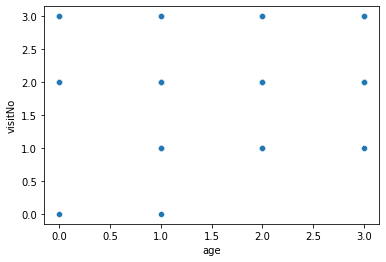

In [39]:
x='age'
y='visitNo'
sns.scatterplot(data=df, x=x, y=y)

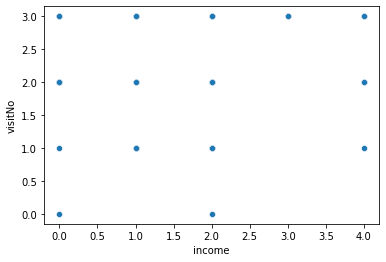

In [40]:
x='income'
y='visitNo'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [41]:
import statsmodels.api as sm

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

In [43]:
# define the dependent and independent variables
X=df[['age','income']]
y=df['visitNo']


In [44]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,age,income
0,1.0,1,0
1,1.0,1,0
2,1.0,1,0
3,1.0,1,0
4,1.0,1,0


In [45]:
# conduct regression
model = sm.OLS(y, X).fit()

In [46]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                visitNo   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.726
Date:                Wed, 02 Dec 2020   Prob (F-statistic):             0.0699
Time:                        17:46:41   Log-Likelihood:                -119.80
No. Observations:                 113   AIC:                             245.6
Df Residuals:                     110   BIC:                             253.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6905      0.136     19.850      0.0

### Check assumptions

In [47]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,0.334802,2.665198
1,0.334802,2.665198
2,-0.665198,2.665198
3,0.334802,2.665198
4,-0.665198,2.665198


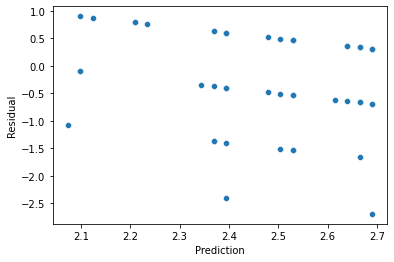

In [48]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

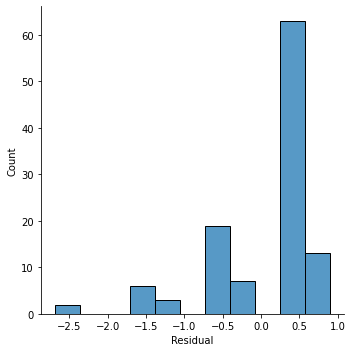

In [49]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [50]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.792915,2.538954e-11,False


In [51]:
pg.pairwise_corr(df,columns=['age','income'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,age,income,pearson,two-sided,113,0.486,"[0.33, 0.62]",0.236,0.223,0.531,0.0,2.883e+05,1.0


#Logit Analysis

In [ ]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()